In [15]:
import pandas as pd
data=pd.read_csv("/content/LIMFADD.csv")

In [16]:
data.head()

,Followers,Following,Following/Followers,Posts,Posts/Followers,Bio,Profile Picture,External Link,Mutual Friends,Threads,Labels
0,2,2757,1378.5,0,0,N,N,N,0,N,Bot
1,2,505,252.5,0,0,N,Yes,N,0,N,Scam
2,6786,1782,0.262599469,1589,6051.040404,yes,N,Yes,10,N,Real
3,21,1281,61,0,0,N,Yes,N,0,N,Bot
4,585,1682,2.875213675,2663,926.1920333,yes,N,N,12,Yes,Real


In [17]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Followers            15000 non-null  int64 
 1   Following            15000 non-null  int64 
 2   Following/Followers  15000 non-null  object
 3   Posts                15000 non-null  int64 
 4   Posts/Followers      15000 non-null  object
 5   Bio                  15000 non-null  object
 6   Profile Picture      15000 non-null  object
 7   External Link        15000 non-null  object
 8   Mutual Friends       15000 non-null  int64 
 9   Threads              15000 non-null  object
 10  Labels               15000 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.3+ MB


In [18]:
data.columns


Index(['Followers', 'Following', 'Following/Followers', 'Posts',
       'Posts/Followers', 'Bio', 'Profile Picture', 'External Link',
       'Mutual Friends', 'Threads', 'Labels'],
      dtype='object')

In [19]:
data['Labels'].value_counts()


,count
Labels,
Bot,3750
Scam,3750
Real,3750
Spam,3750


In [20]:
# Remove rows where label is 'Scam'
data = data[data['Labels'].str.lower() != 'scam']


In [21]:
data['Labels'].value_counts()

,count
Labels,
Bot,3750
Real,3750
Spam,3750


In [22]:
from sklearn.preprocessing import LabelEncoder

# Make a copy
df = data.copy()

# Handle only object-type columns
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = df[col].astype(str).str.lower().str.strip()  # clean text
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [23]:
df.head()

,Followers,Following,Following/Followers,Posts,Posts/Followers,Bio,Profile Picture,External Link,Mutual Friends,Threads,Labels
0,2,2757,7999,0,1,0,0,0,0,0,0
2,6786,1782,6641,1589,8239,1,0,1,10,0,1
3,21,1281,10327,0,1,0,1,0,0,0,0
4,585,1682,8758,2663,9670,1,0,0,12,1,1
8,21,4459,8879,0,1,0,0,0,0,0,0


In [24]:
print(df.dtypes)        # All columns should be int or float
print(df.isnull().sum())  # Should return all zeros


Followers              int64
Following              int64
Following/Followers    int64
Posts                  int64
Posts/Followers        int64
Bio                    int64
Profile Picture        int64
External Link          int64
Mutual Friends         int64
Threads                int64
Labels                 int64
dtype: object
Followers              0
Following              0
Following/Followers    0
Posts                  0
Posts/Followers        0
Bio                    0
Profile Picture        0
External Link          0
Mutual Friends         0
Threads                0
Labels                 0
dtype: int64


Apply Neural Network

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


In [27]:

# Separate features and target
X = df.drop('Labels', axis=1)
y = df['Labels']
y_cat = to_categorical(y, num_classes=3)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=42, stratify=y)


In [28]:

# Neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



In [30]:
# Train
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32, verbose=1)


Epoch 1/30
282/282 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7781 - loss: 308.9857 - val_accuracy: 0.9502 - val_loss: 11.3182
Epoch 2/30
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9035 - loss: 28.8087 - val_accuracy: 0.9507 - val_loss: 2.0104
Epoch 3/30
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9135 - loss: 8.3676 - val_accuracy: 0.9213 - val_loss: 0.9702
Epoch 4/30
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9049 - loss: 3.6740 - val_accuracy: 0.9436 - val_loss: 0.4623
Epoch 5/30
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8903 - loss: 2.5139 - val_accuracy: 0.9338 - val_loss: 0.4124
Epoch 6/30
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9045 - loss: 1.4516 - val_accuracy: 0.9418 - val_loss: 0.2737
Epoch 7/30
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9046 - loss: 0.8868 - val_accuracy: 0.9440 - val_loss: 0.3032
Epoch 8/30
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8955 - loss: 0.7587 - val_accuracy

In [31]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.9413


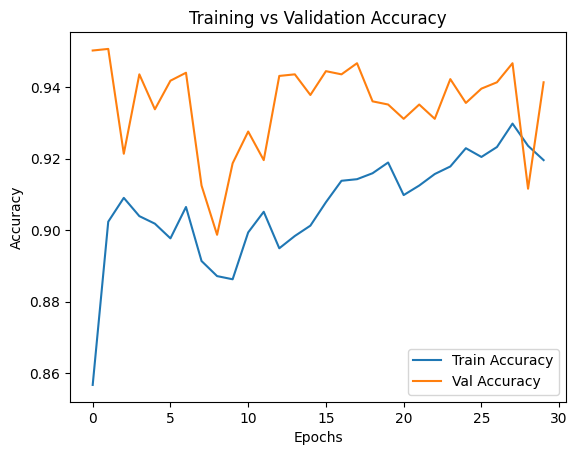

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()


In [33]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Convert predictions to class labels
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true_labels, y_pred_labels))

# Classification report
print("Classification Report:")
print(classification_report(y_true_labels, y_pred_labels, target_names=['Real', 'Fake', 'Bot']))


71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
Confusion Matrix:
[[750   0   0]
 [  2 745   3]
 [  0 127 623]]
Classification Report:
              precision    recall  f1-score   support

        Real       1.00      1.00      1.00       750
        Fake       0.85      0.99      0.92       750
         Bot       1.00      0.83      0.91       750

    accuracy                           0.94      2250
   macro avg       0.95      0.94      0.94      2250
weighted avg       0.95      0.94      0.94      2250



In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(3, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [36]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, verbose=1)


In [37]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop, checkpoint],
    verbose=1
)


Epoch 1/50
278/282 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8375 - loss: 0.4203
Epoch 1: val_accuracy improved from -inf to 0.95156, saving model to best_model.h5


282/282 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8387 - loss: 0.4175 - val_accuracy: 0.9516 - val_loss: 0.1170
Epoch 2/50
274/282 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9401 - loss: 0.1506
Epoch 2: val_accuracy improved from 0.95156 to 0.95911, saving model to best_model.h5


282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9401 - loss: 0.1505 - val_accuracy: 0.9591 - val_loss: 0.0961
Epoch 3/50
275/282 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9408 - loss: 0.1304
Epoch 3: val_accuracy did not improve from 0.95911
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9408 - loss: 0.1303 - val_accuracy: 0.9560 - val_loss: 0.0929
Epoch 4/50
280/282 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9387 - loss: 0.1336
Epoch 4: val_accuracy did not improve from 0.95911
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9387 - loss: 0.1335 - val_accuracy: 0.9582 - val_loss: 0.0909
Epoch 5/50
270/282 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9459 - loss: 0.1106
Epoch 5: val_accuracy did not improve from 0.95911
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9459 - loss: 0.1109 - val_accuracy: 0.9289 - val_loss: 0.1322
Epoch 6/50
265/282 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9450 - loss: 0.1110
Epoch 6: val_accuracy did not impro

282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9494 - loss: 0.0963 - val_accuracy: 0.9596 - val_loss: 0.0924
Epoch 10/50
275/282 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9523 - loss: 0.1055
Epoch 10: val_accuracy did not improve from 0.95956
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9523 - loss: 0.1054 - val_accuracy: 0.9587 - val_loss: 0.0887
Epoch 11/50
270/282 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9501 - loss: 0.0956
Epoch 11: val_accuracy did not improve from 0.95956
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9500 - loss: 0.0957 - val_accuracy: 0.9538 - val_loss: 0.0871
Epoch 12/50
275/282 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9490 - loss: 0.0952
Epoch 12: val_accuracy did not improve from 0.95956
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9490 - loss: 0.0953 - val_accuracy: 0.9582 - val_loss: 0.0864
Epoch 13/50
267/282 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9481 - loss: 0.0980
Epoch 13: val_accuracy did n

282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9498 - loss: 0.0965 - val_accuracy: 0.9618 - val_loss: 0.0941
Epoch 15/50
265/282 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9514 - loss: 0.1000
Epoch 15: val_accuracy did not improve from 0.96178
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9513 - loss: 0.0999 - val_accuracy: 0.9511 - val_loss: 0.0935
Epoch 16/50
279/282 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9470 - loss: 0.1014
Epoch 16: val_accuracy did not improve from 0.96178
282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9470 - loss: 0.1014 - val_accuracy: 0.9560 - val_loss: 0.0881
Epoch 17/50
271/282 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9482 - loss: 0.0985
Epoch 17: val_accuracy did not improve from 0.96178
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9484 - loss: 0.0984 - val_accuracy: 0.9582 - val_loss: 0.0842
Epoch 18/50
275/282 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9517 - loss: 0.0931
Epoch 18: val_accuracy did n

In [38]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")


Test Accuracy: 0.9582


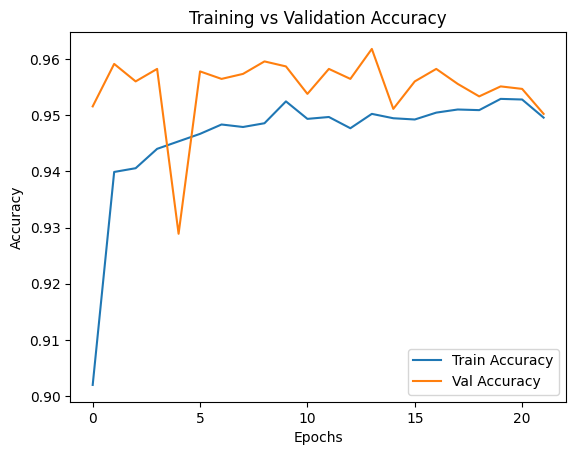

In [39]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training vs Validation Accuracy")
plt.show()


In [40]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Convert predictions to class labels
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true_labels, y_pred_labels))

# Classification report
print("Classification Report:")
print(classification_report(y_true_labels, y_pred_labels, target_names=['Real', 'Fake', 'Bot']))


71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Confusion Matrix:
[[750   0   0]
 [  3 737  10]
 [  0  81 669]]
Classification Report:
              precision    recall  f1-score   support

        Real       1.00      1.00      1.00       750
        Fake       0.90      0.98      0.94       750
         Bot       0.99      0.89      0.94       750

    accuracy                           0.96      2250
   macro avg       0.96      0.96      0.96      2250
weighted avg       0.96      0.96      0.96      2250



In [41]:
model.save("my_fake_bot_detector_95.h5")
